# Question 1

a. The benefits of using a counting based vector representation like TF-IDF over a learning based representation like Word2Vec are - 
   - Counting based vector models are computationally efficient
   - TF-IDF loses less information while doing dimensionality reduction
   
b. Fasttext operates at character level whereas Word2Vec operates at word level.
   - Fasttext can handle out of vocabulary words.
   - Fasttext can also handle grammatical errors.

### Importing required libraries

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from gensim.models import Word2Vec
from pdfminer.high_level import extract_text

import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
#import amrlib
#import penman 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vishal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vishal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
def pre_process(sentences):
    preprop_sent = list()
    for sent in sentences:
        rm_stop_tokens = [word for word in word_tokenize(sent) if not word in stopwords.words()]
        punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
        rm_stop_tokens = " ".join([i for i in rm_stop_tokens if len(i)>1])
        for i in rm_stop_tokens:
            if i in punc:
                rm_stop_tokens = rm_stop_tokens.replace(i, "")
        preprop_sent.append(rm_stop_tokens)
    
    return preprop_sent

# Question 1(c)

In [8]:
file1 = open("../data/projs.txt", "r", )
lines= file1.readlines()
sentences = list()
for line in lines:
    sentences.append(line.strip())

In [17]:
# TFIDR Vectorizer gives value based on Inverse Document Frequency, i.e., relative
# occurence of words in the documents. Hence, context is by word frequency.
vectorizer = TfidfVectorizer()
reps = vectorizer.fit_transform(sentences)
print(vectorizer.get_feature_names())
print(X.toarray())

['10', '2022', 'analysis', 'and', 'ann', 'answer', 'answering', 'application', 'arizona', 'artical', 'artificial', 'aspect', 'asr', 'automatic', 'banks', 'based', 'captioning', 'carolina', 'cell', 'chatbot', 'conditions', 'connection', 'created', 'crime', 'crisis', 'damaged', 'data', 'dataset', 'detecting', 'diabetes', 'doc', 'doctor', 'election', 'elections', 'entity', 'events', 'evolving', 'extracting', 'faq', 'fasttext', 'firearm', 'foods', 'for', 'from', 'gubernatorial', 'image', 'improve', 'in', 'mississippi', 'models', 'neighborhoods', 'networks', 'neural', 'new', 'nlp', 'novel', 'of', 'on', 'one', 'ones', 'ongoing', 'perovskite', 'predicting', 'prediction', 'procedure', 'publications', 'quesries', 'question', 'rating', 'recognition', 'recommendation', 'regarding', 'regulation', 'regulations', 'scientific', 'sentiment', 'services', 'severity', 'short', 'solar', 'south', 'specialist', 'speech', 'state', 'summarization', 'summary', 'synthesis', 'system', 'target', 'techniques', 'te

In [ ]:
for i in range(0, len(list_sent)):
    print ("similarity of project-8 (" + list_sent[7] + ") with " + str(i+1) + "(" + list_sent[i] + ") is = "  + str(cosine_similarity (X[7], X[i])))

In [45]:
sentences[14]

'Chatbot Elections FAQ State Mississippi'

My project doesn't show 0.9 cosine similarity value with any other project. 
The closest project is 11 - 'Chatbot answer quesries WHO Water Regulations' (sim-0.13)

Cluster 1: ['Water - South Carolina', 'Crime analysis in South Carolina', 'Predicting the 2022 gubernatorial election of South Carolina using sentiment analysis of Twitter.']
Cluster 2: ["TOS: Banks' Terms of Services summary", 'Water Regulation Summarization', 'Scientific Artical Summarization', 'Summarization of Terms and conditions']
Cluster 3: ['Water - South Carolina', 'Evolving Firearm Regulations', 'Entity Recognition : Water Data Regulations', 'Water Regulation Summarization', 'Chatbot to answer quesries regarding WHO Water Regulations', 'Water Regulations - Arizona']


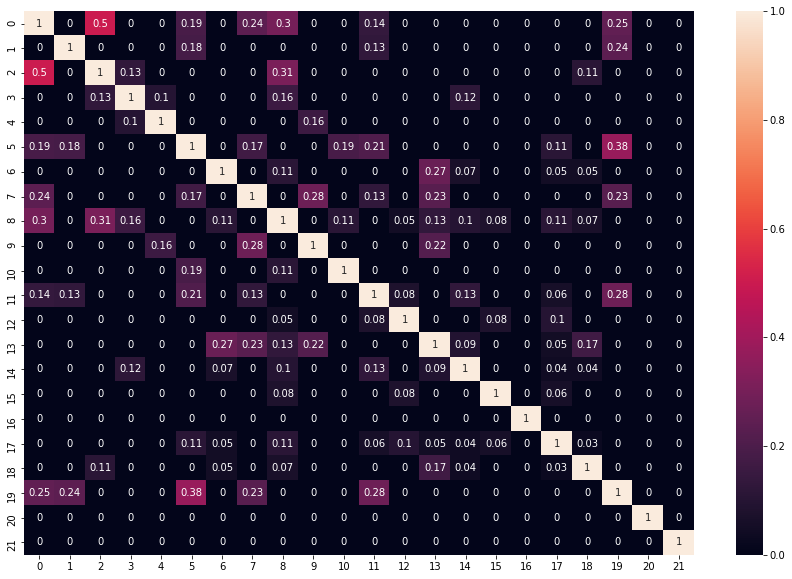

In [25]:
similarity = []
for i in range(len(sentences)):
    temp = []
    for j in range(len(sentences)):
        temp.append(round(cosine_similarity(reps[i], reps[j])[0][0],2) )
    similarity.append(temp)

# visualize sim_mat in 2d format
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(similarity, annot=True)

count = 0
for i in range(len(similarity)):
    temp = []
    for j in range(len(similarity[i])):
    
        if i == j:
            break
    
        if sim_mat[i][j] >= 0.2:
            temp.append(sentences[j])
    
    if len(temp) > 1:
        count += 1
        temp.append(sentences[i])
        print(f'Cluster {count}: {temp}')

In [36]:
# train model
model = Word2Vec(corpus, min_count=1)
# summarize the loaded model
print("INFO: Model - \n" + str(model))

INFO: Model - 
Word2Vec(vocab=97, size=100, alpha=0.025)


In [37]:
# summarize vocabulary
words = list(model.wv.vocab)
print("INFO: Words found - \n" + str(words))

INFO: Words found - 
['Water', 'South', 'Carolina', 'Evolving', 'Firearm', 'Regulations', 'Crime', 'analysis', 'Target', 'aspect', 'based', 'sentiment', 'urban', 'neighborhoods', 'Extracting', 'synthesis', 'procedure', 'solar', 'cell', 'perovskite', 'scientific', 'publications', 'Entity', 'Recognition', 'Data', 'TOS', 'Banks', 'Terms', 'Services', 'summary', 'Regulation', 'Summarization', 'Predicting', '2022', 'gubernatorial', 'election', 'Twitter', 'Scientific', 'Artical', 'New', 'FastText', 'Election', 'data', 'Chatbot', 'answer', 'quesries', 'WHO', 'Verifying', 'foods', 'connection', 'improve', 'diabetes', 'NLP', 'techniques', 'conditions', 'Elections', 'FAQ', 'State', 'Mississippi', 'Image', 'Captioning', 'Transformer', 'Models', 'Specialist', 'Doctor', 'Recommendation', 'System', 'Application', 'Artificial', 'Neural', 'Networks', 'ANN', 'Automatic', 'Speech', 'ASR', 'Novel', 'Dataset', 'created', 'YouTube', 'Detecting', 'rating', 'severity', 'urgency', 'short', 'onetime', 'crisis'

In [38]:
len(words)

97

In [39]:
X = model[model.wv.vocab]

/Users/vishal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [40]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

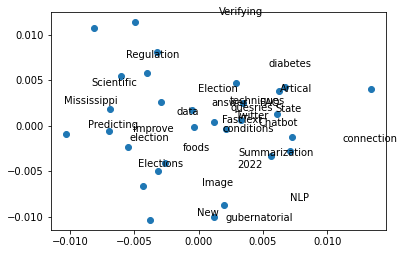

In [41]:
# Plot the points
pyplot.scatter(result[30:60, 0], result[30:60, 1])
words = list(model.wv.vocab)
words = words[30:60]
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# Question 2(a)

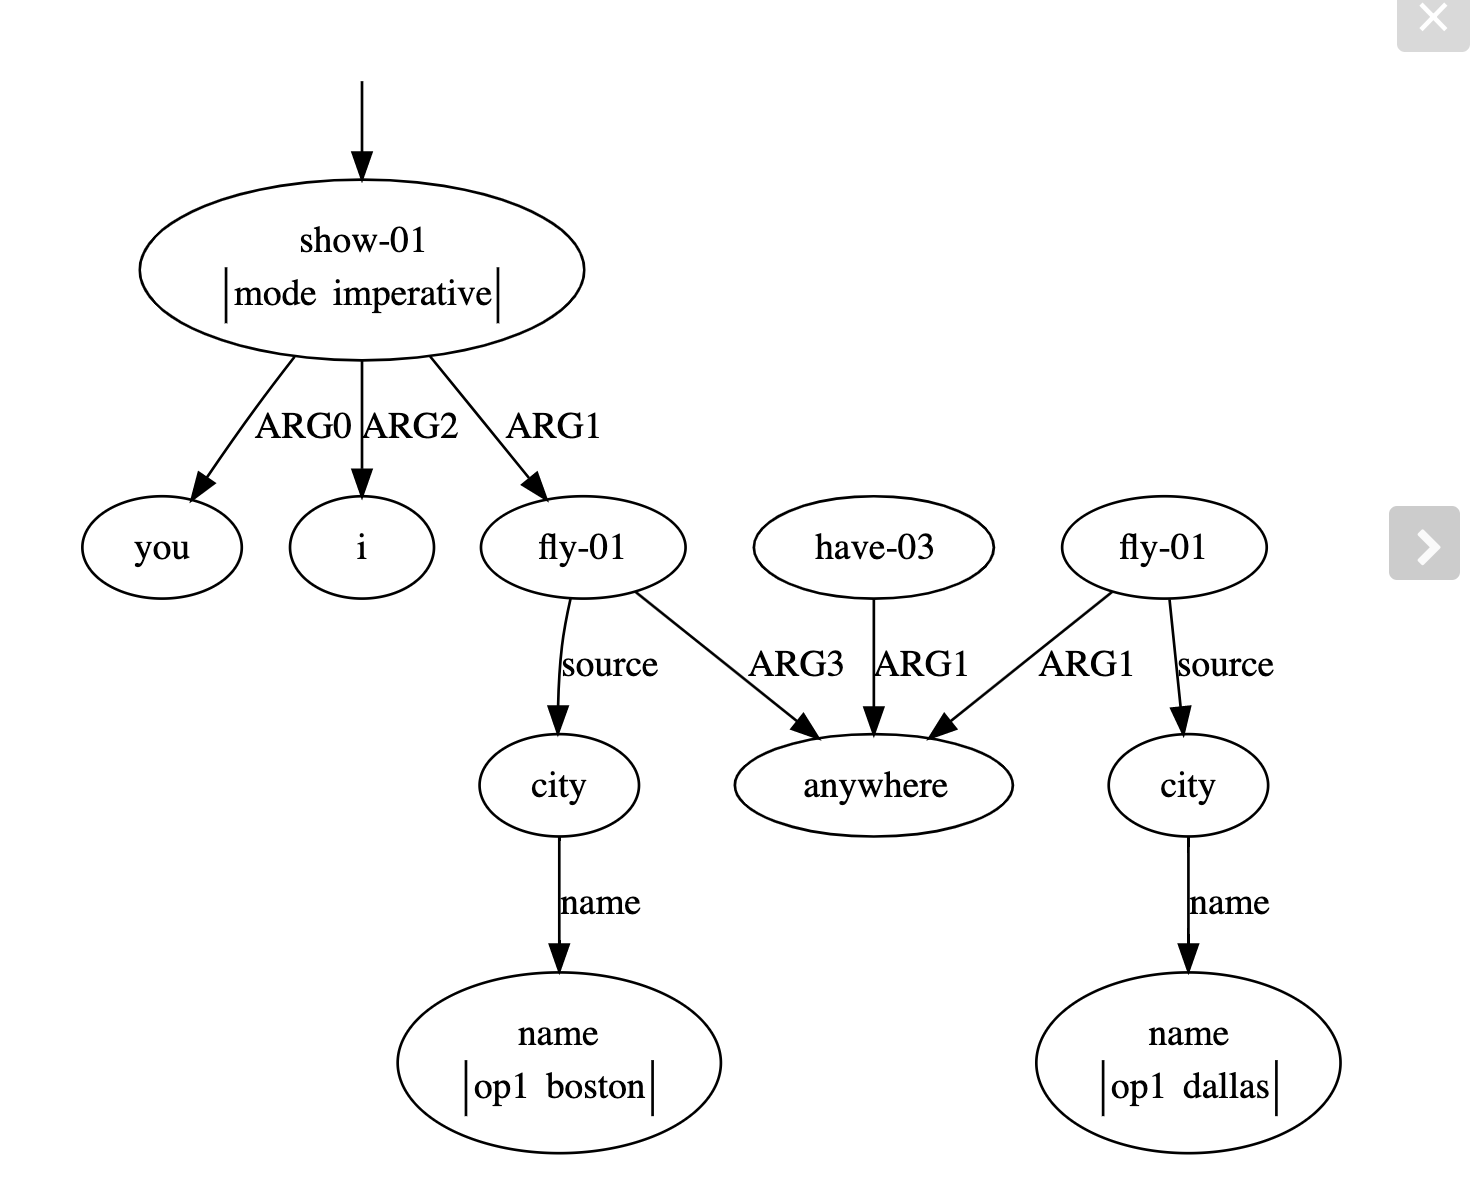

# Question 2(b)

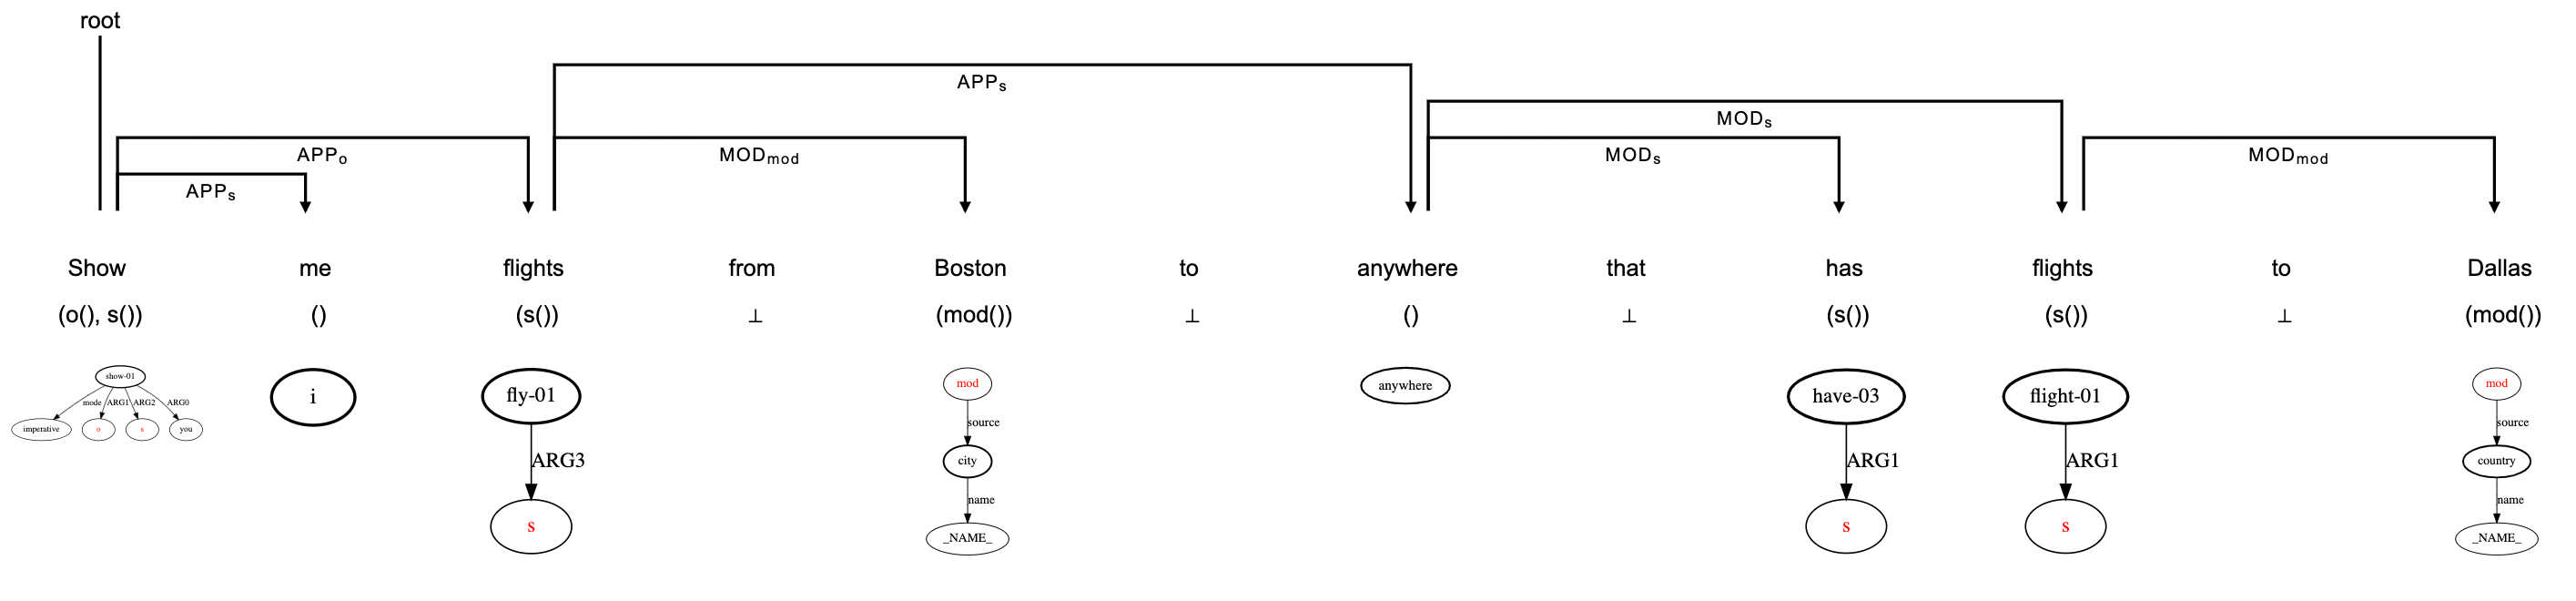

The suffix on show, fly, have (01,02,03) represents the predicate arity and ARG1, ARG2, ARG3, and ARG0 represent different predicate roles. A reference for this notation is present in **[AMR Guidelines](https://github.com/amrisi/amr-guidelines/blob/master/amr.md)**

In [43]:
stog = amrlib.load_stog_model()

In [ ]:
graphs = stog.parse_sents(['show me flights from Boston to anywhere that has flights to Dallas'])
for graph in graphs:
    print(graph)

# ::snt show me flights from Boston to anywhere that has flights to Dallas
(s / show-01
      :mode imperative
      :ARG0 (y / you)
      :ARG1 (f / fly-01
            :source (c / city
                  :name (n / name
                        :op1 "Boston"))
            :destination (a / anywhere
                  :ARG0-of (h / have-03
                        :ARG1 (f2 / fly-01
                              :destination (c2 / city
                                    :name (n2 / name
                                          :op1 "Dallas"))))))
      :ARG2 (ii / i))


In [ ]:
g = penman.decode("""(s / show-01
      :mode imperative
      :ARG0 (y / you)
      :ARG1 (f / fly-01
            :source (c / city
                  :name (n / name
                        :op1 "Boston"))
            :destination (a / anywhere
                  :ARG0-of (h / have-03
                        :ARG1 (f2 / fly-01
                              :destination (c2 / city
                                    :name (n2 / name
                                          :op1 "Dallas"))))))
      :ARG2 (ii / i))""")

In [ ]:
g.triples

[('s', ':instance', 'show-01'),
 ('s', ':mode', 'imperative'),
 ('s', ':ARG0', 'y'),
 ('y', ':instance', 'you'),
 ('s', ':ARG1', 'f'),
 ('f', ':instance', 'fly-01'),
 ('f', ':source', 'c'),
 ('c', ':instance', 'city'),
 ('c', ':name', 'n'),
 ('n', ':instance', 'name'),
 ('n', ':op1', '"Boston"'),
 ('f', ':destination', 'a'),
 ('a', ':instance', 'anywhere'),
 ('h', ':ARG0', 'a'),
 ('h', ':instance', 'have-03'),
 ('h', ':ARG1', 'f2'),
 ('f2', ':instance', 'fly-01'),
 ('f2', ':destination', 'c2'),
 ('c2', ':instance', 'city'),
 ('c2', ':name', 'n2'),
 ('n2', ':instance', 'name'),
 ('n2', ':op1', '"Dallas"'),
 ('s', ':ARG2', 'ii'),
 ('ii', ':instance', 'i')]

# Question 3

In [26]:
var  = extract_text("../data/Resume.pdf")
texts = var.split("\n")
texts = [i for i in texts if len(i)>2]
texts = pre_process(texts)
corpus2 = [nltk.word_tokenize(i) for i in texts]

In [27]:
# train model
model = Word2Vec(corpus2, min_count=1)
# summarize the loaded model
print("INFO: Model - \n" + str(model))

INFO: Model - 
Word2Vec(vocab=263, size=100, alpha=0.025)


In [29]:
# summarize vocabulary
words = list(model.wv.vocab)
print("INFO: Words found - \n" + str(words))

INFO: Words found - 
['Vishal', 'Pallagani', '��������', '810', 'Pulaski', 'St', 'Apt', '311', 'Columbia', 'South', 'Carolina', '29201', '�������', 'vishalp', 'mailboxscedu', 'GitHub', 'VishalPallagani', 'LinkedIn', 'vishalpallagani', '������������', 'Education', 'University', 'Doctor', 'Philosophy', 'Computer', 'Science', 'Coursework', 'Artificial', 'Intelligence', 'Automated', 'Planning', 'Reinforcement', 'Learning', 'Trusted', 'AI', 'Naya', 'Raipur', 'Chhattisgarh', 'India', 'International', 'Institute', 'Information', 'Technology', 'Bachelor', 'Aug', '2016', 'May', '2020', 'Data', 'StructuresAlgorithms', 'Discrete', 'Math', 'StatisticsProbability', '����', 'Experience', 'SC', 'Jan', '2021–Present', 'Research', 'Scientist', 'Intern', 'IBM', 'Thomas', 'J', 'Watson', 'Center', 'Yorktown', 'Heights', 'NY', '2022–Aug', '2022', 'proposed', 'Plansformer', 'large', 'language', 'model', 'finetuned', 'planning', 'problems', 'capable', 'generating', 'valid', 'shortest', 'symbolic', 'plans', '

In [30]:
len(words)

263

In [31]:
X = model[model.wv.vocab]

/Users/vishal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [32]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

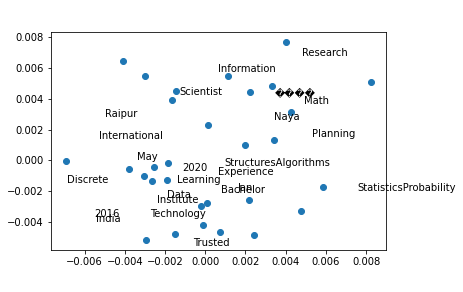

In [34]:
# Plot the points
pyplot.scatter(result[30:60, 0], result[30:60, 1])
words = list(model.wv.vocab)
words = words[30:60]
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [35]:
sentences = pre_process(sentences)
corpus = [nltk.word_tokenize(i) for i in sentences]